# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [1]:
import numpy as np
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
X = X.T
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]
X_norm = X.astype(np.float64)
for i in range(1,X_norm.shape[0]):
    X_norm[i] = (X[i] - X[i].min()) / (X[i].max() - X[i].min())
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err
def eval_model_reg2(lambda_):
    res = []
    for l in lambda_:
        np.random.seed(42)
        W = np.random.randn(X_norm.shape[0])
        n = X_norm.shape[1]
        for i in range(1, 5001):
            y_pred = np.dot(W, X_norm)
            err = calc_mse(y, y_pred)
            W -= 1e-2 * (1/n * 2 * np.dot((y_pred - y), X_norm.T) + l* W) 
        res.append(W)
    return res

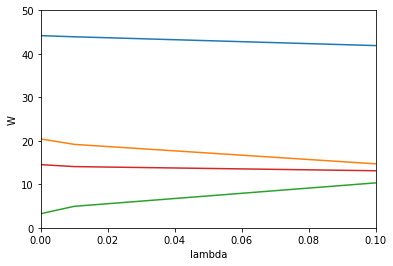

In [2]:
import matplotlib.pyplot as plt
lambda__ = [1 / 10**i for i in range(10)]
res = eval_model_reg2(lambda__)

plt.xlabel('lambda')
plt.ylabel('W')
plt.ylim(0, 50)
plt.xlim(0,0.1)

plt.plot(lambda__, res)
plt.show()

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [3]:
def gradient_descent_reg_l2(X, y, iterations, eta, reg, x_shape_index=0, log=False):
    W = np.random.randn(X.shape[x_shape_index])
    n = X.shape[x_shape_index]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y)
        dReg = reg * W / np.abs(W)
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0 and log:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    if log:
        print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, в зависимости от того, что мы применим последне, нормализацию или стандартизацию.

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot as plt

X, Y, coef = make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=41)
W = gradient_descent_reg_l2(X[:, 1], Y, iterations=5000, eta=1e-4, reg=1e-5, x_shape_index=0, log=False)
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)